In [1]:
import pandas as pd
import numpy as np #Funções matemáticas
import seaborn as sns #Gerar gráficos
import matplotlib.pyplot as plt #Gerar gráficos
import pickle #Gravar variáveis
from sklearn.cluster import KMeans #Realizar a segmentação do mercado / Agrupamento dos clientes
from sklearn.decomposition import PCA #Reduzir a dimensionalidade dos dados

In [2]:
def open_cluster_centers():
  #carregando arquivos
  with open('agrupamentos_clientes.pkl','rb') as f:
    return pickle.load(f)

In [3]:
cluster_centers, creditcard_df, creditcard_scaled_df, labels, n_clusters, wcss_1 = open_cluster_centers()

In [4]:
#Adicionando a classificação do agrupamento nos respectivos clientes
creditcard_df_cluster = pd.concat([creditcard_df, pd.DataFrame({'cluster': labels})], axis=1) #axis: colocar os dados numa outra coluna
creditcard_df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,6
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,4
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,6
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,6


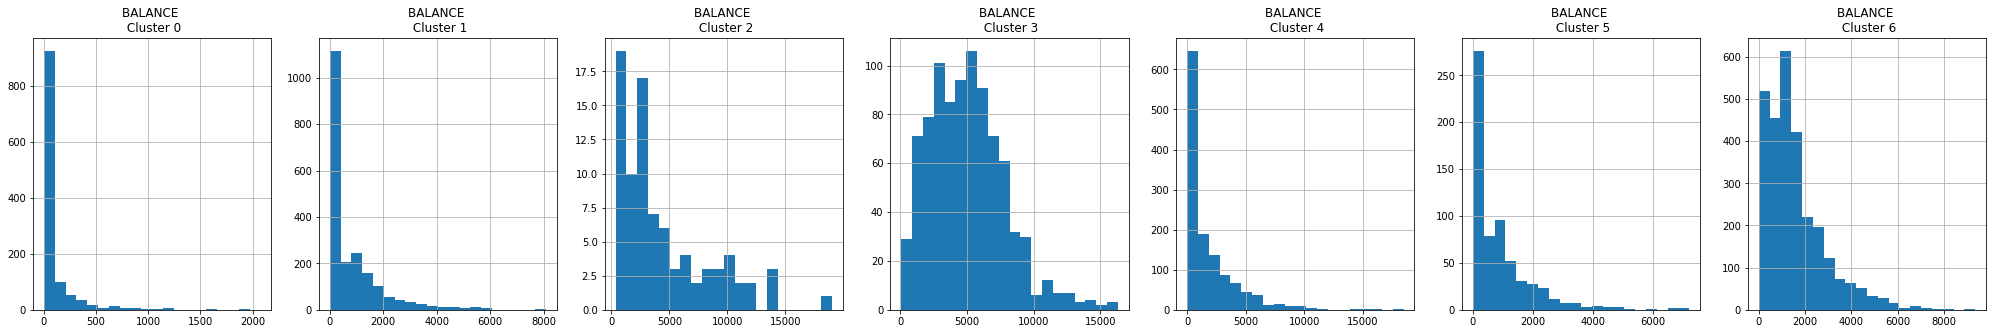

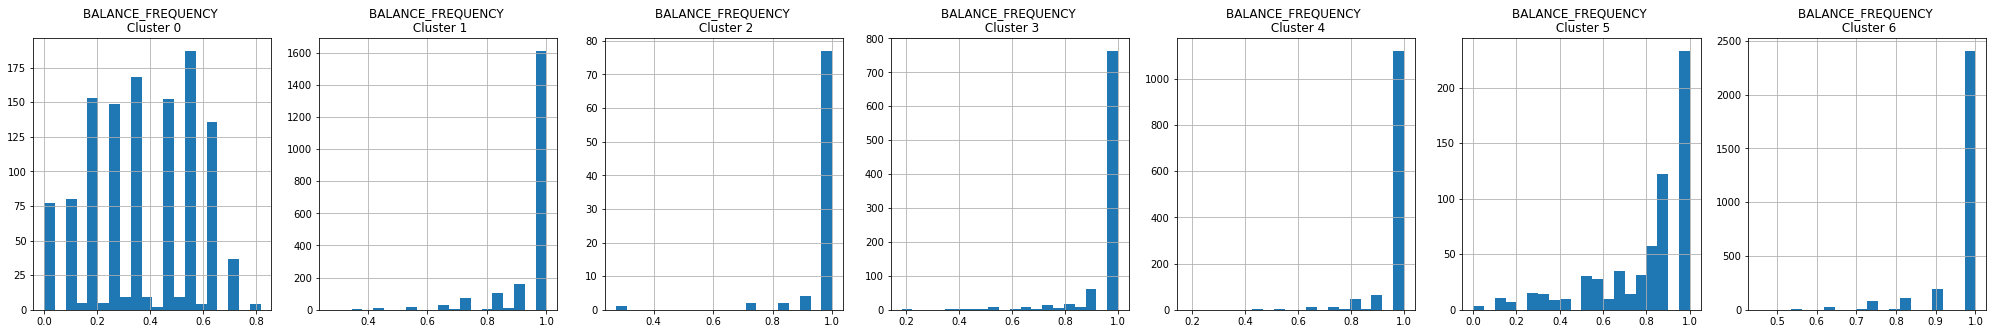

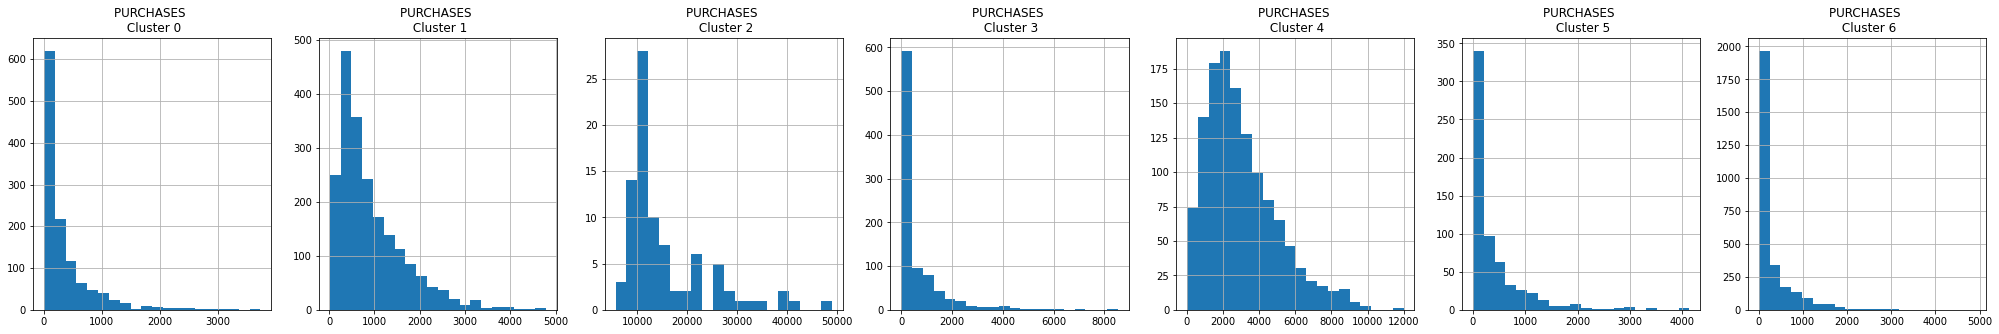

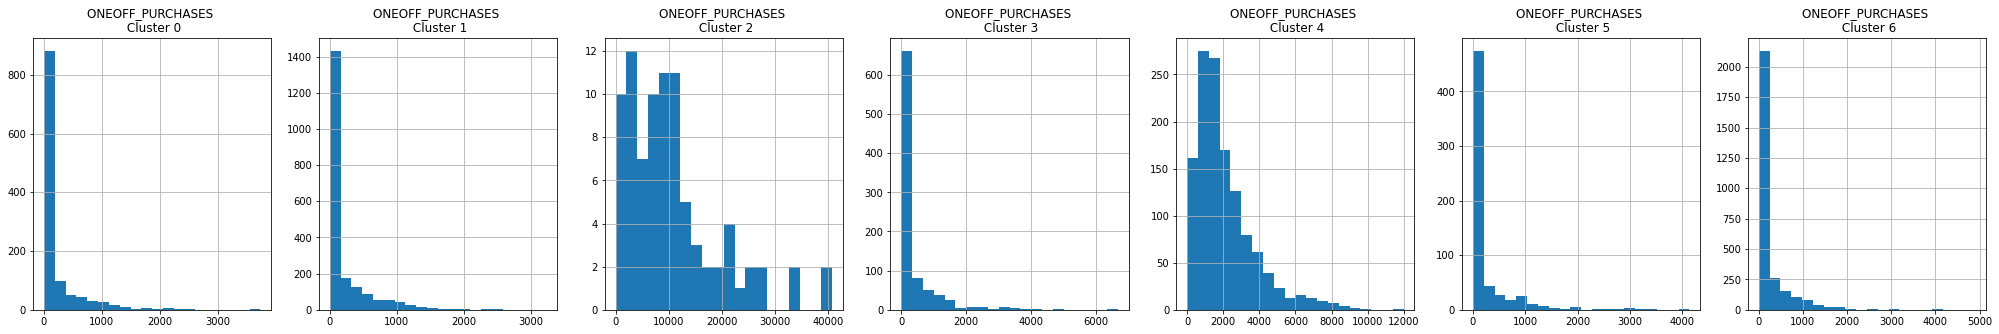

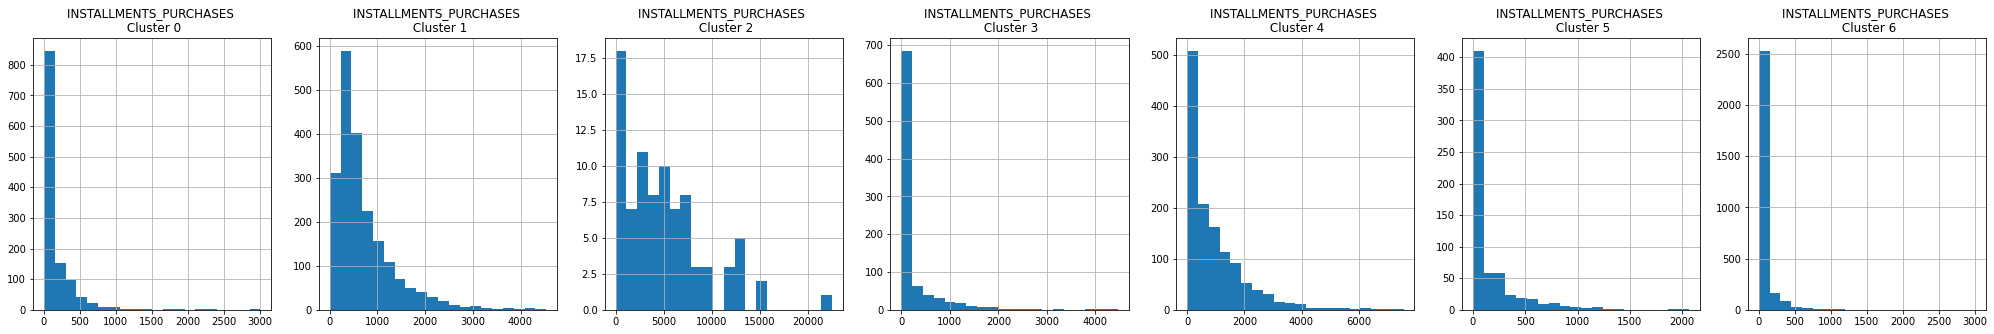

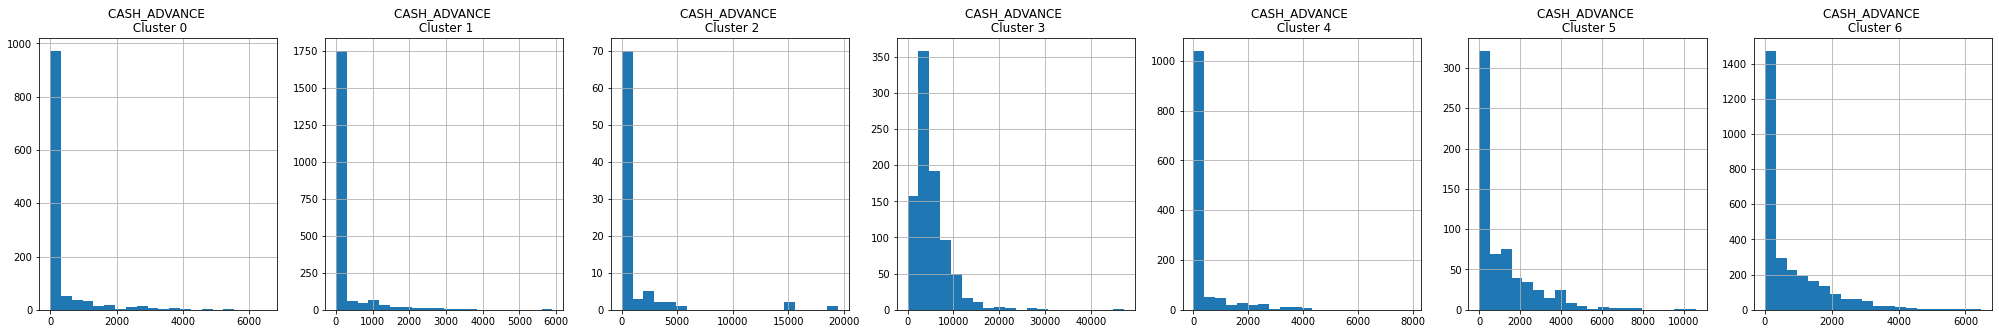

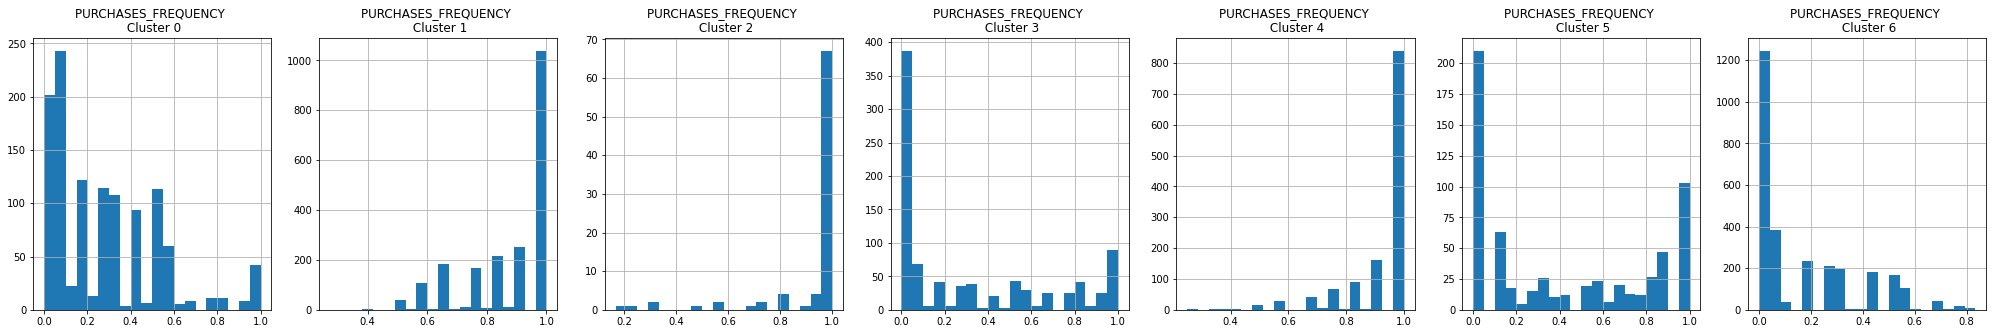

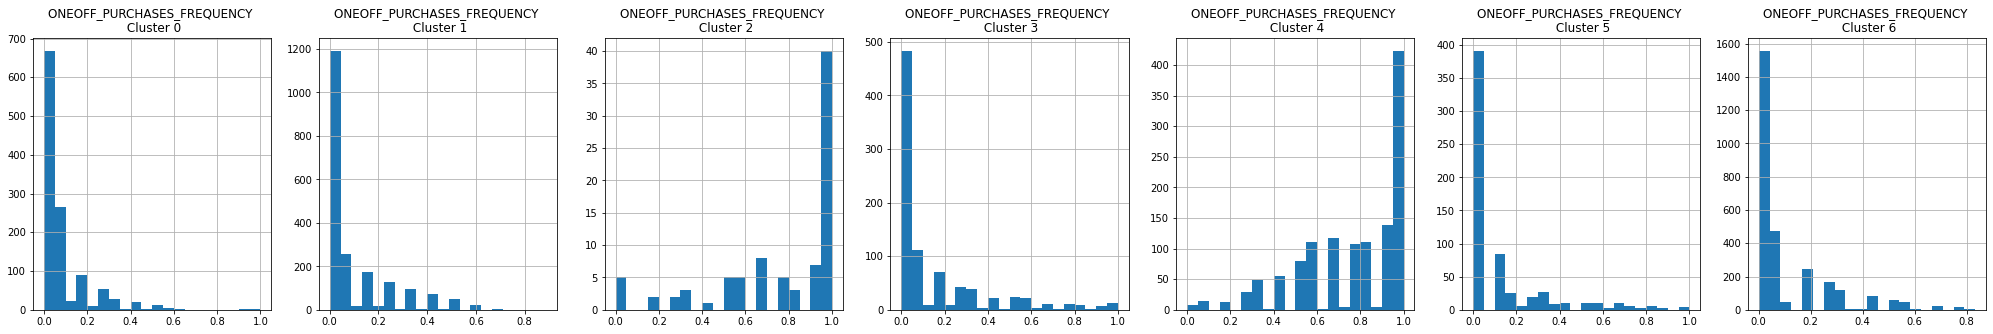

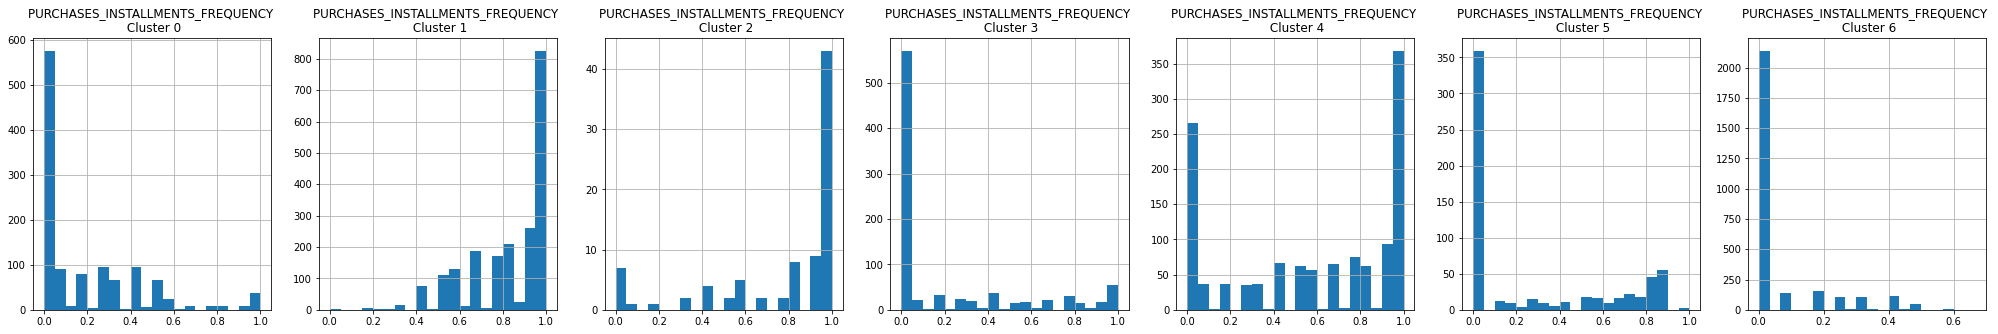

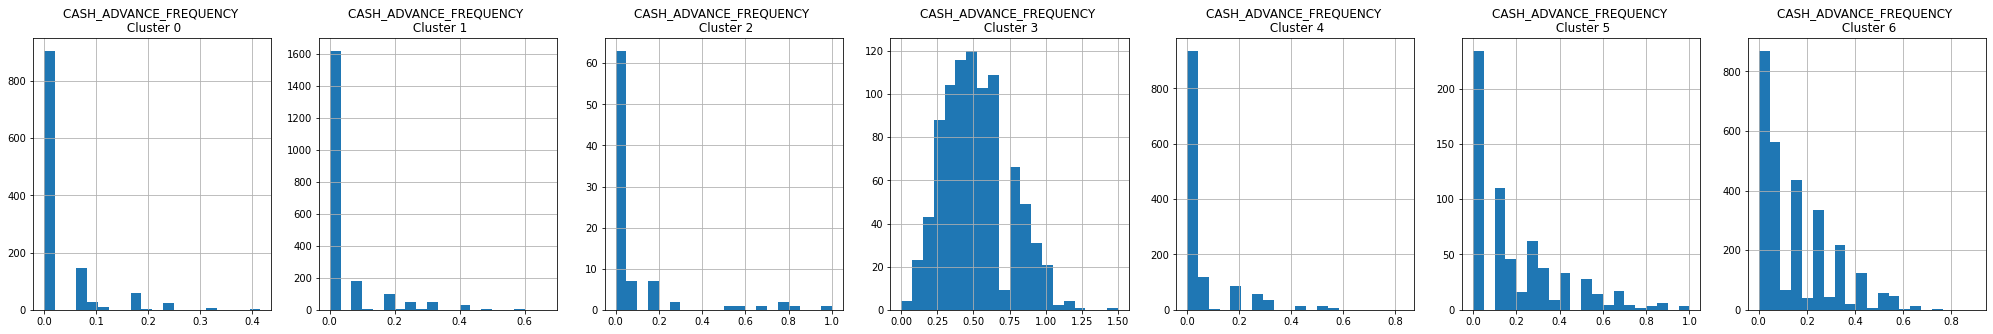

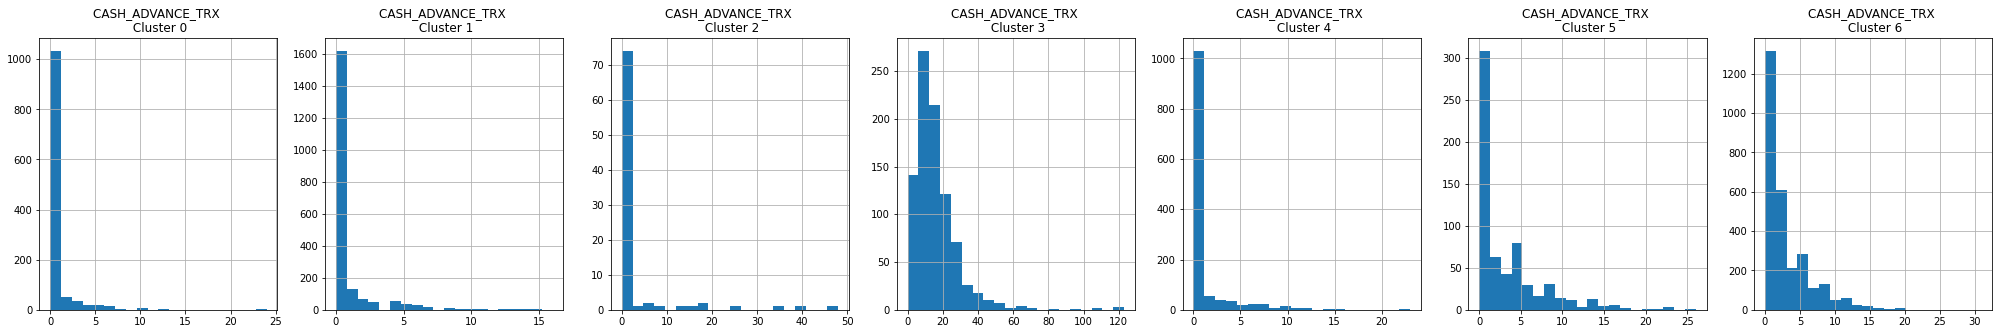

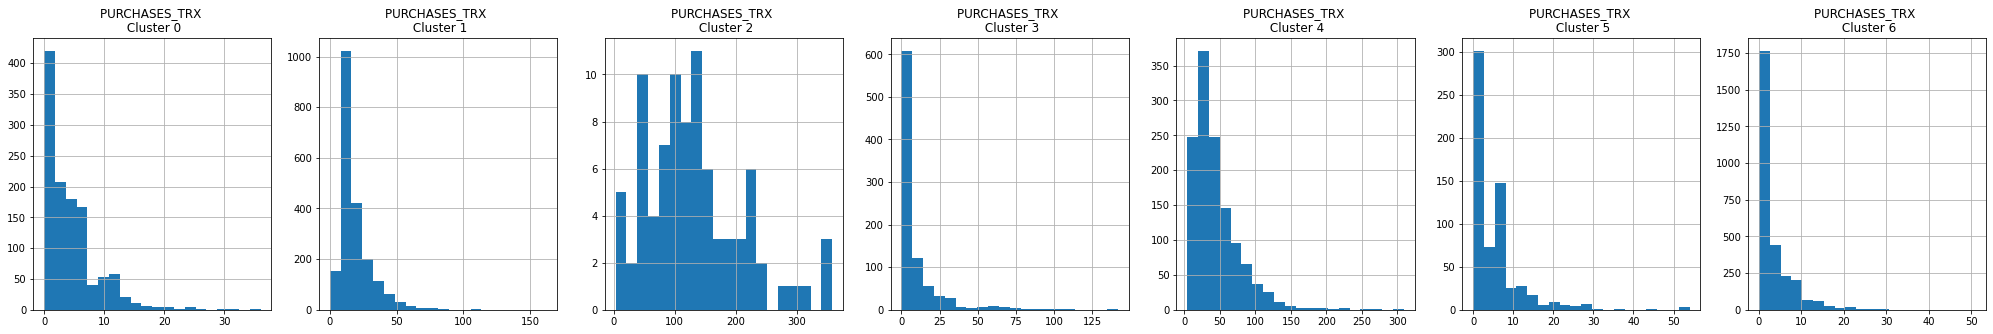

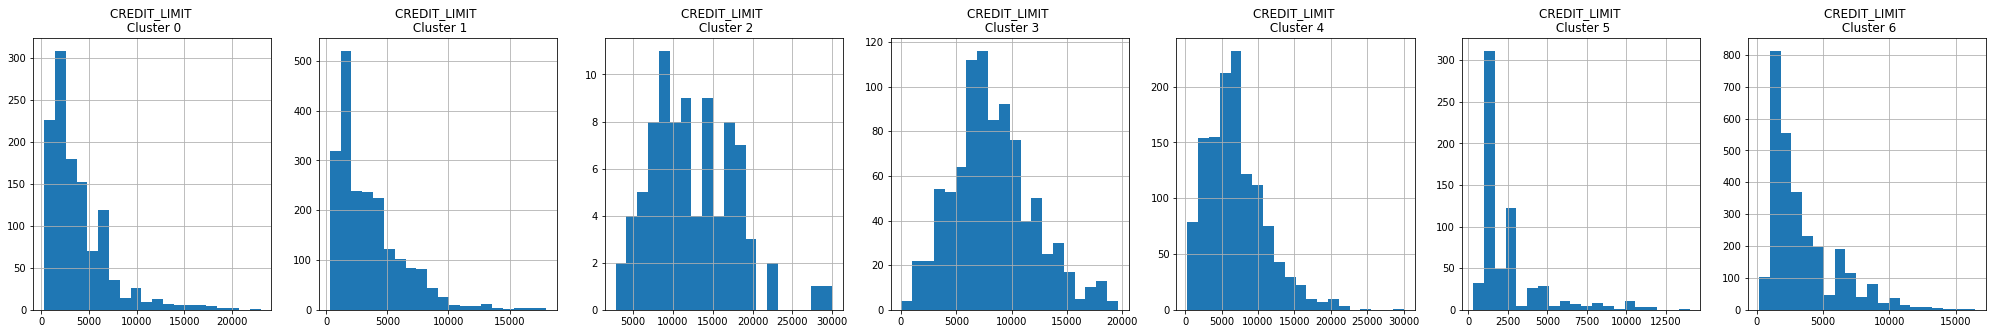

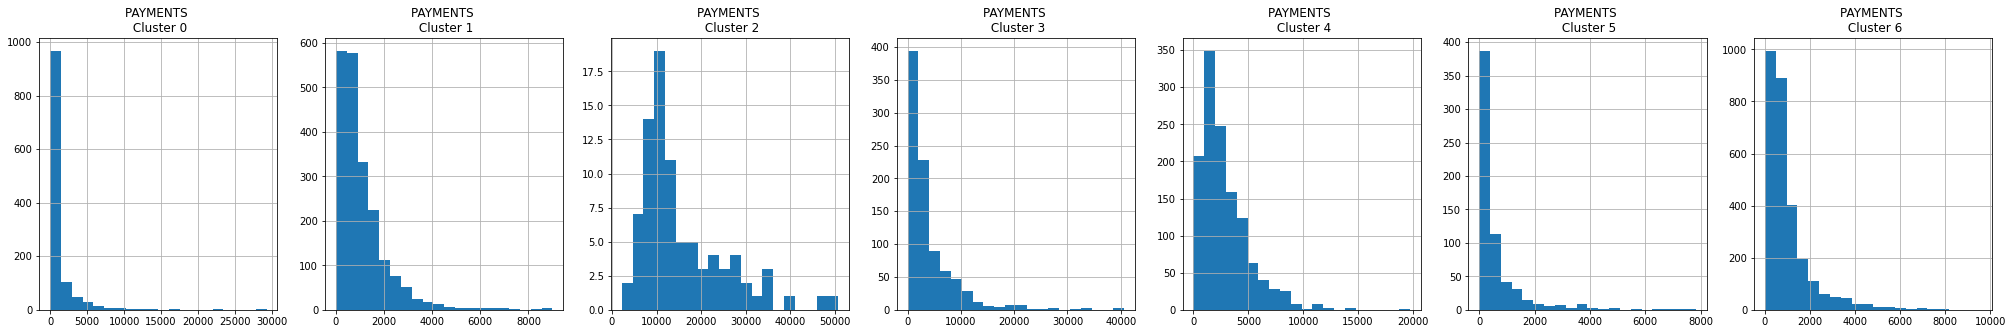

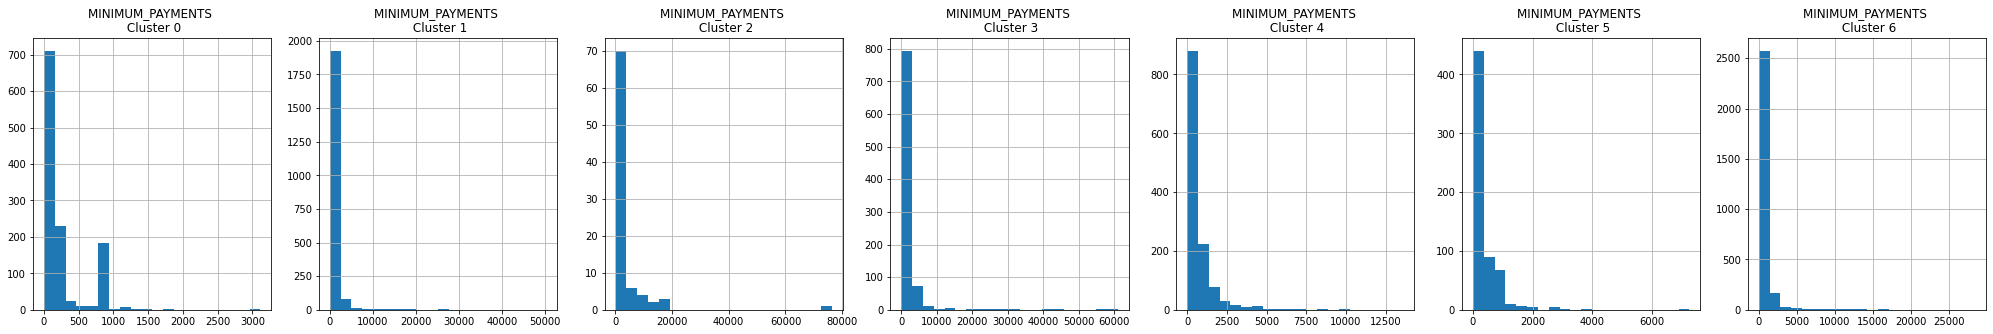

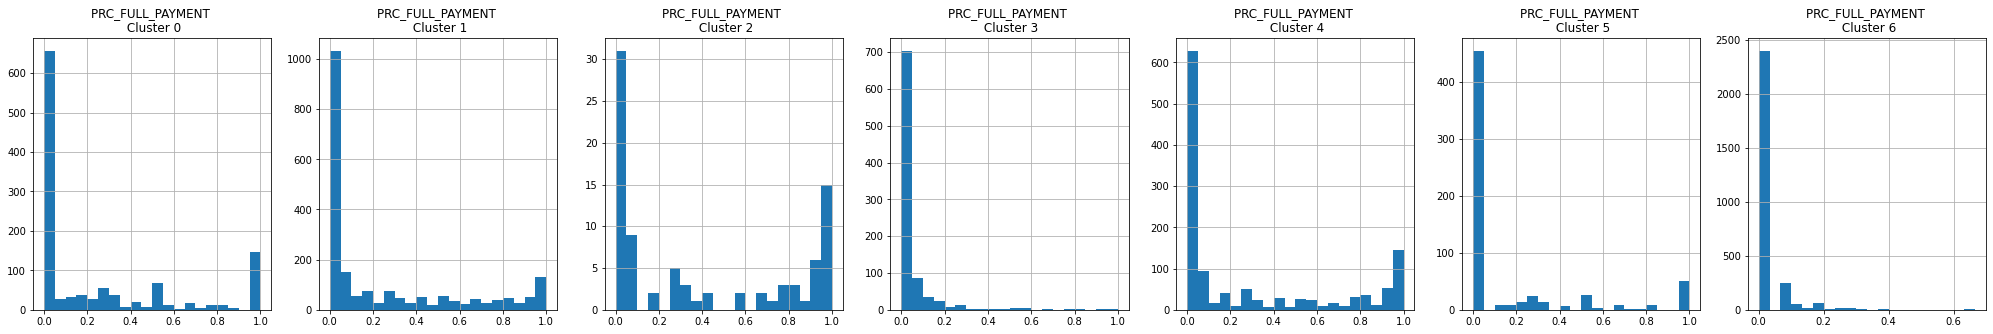

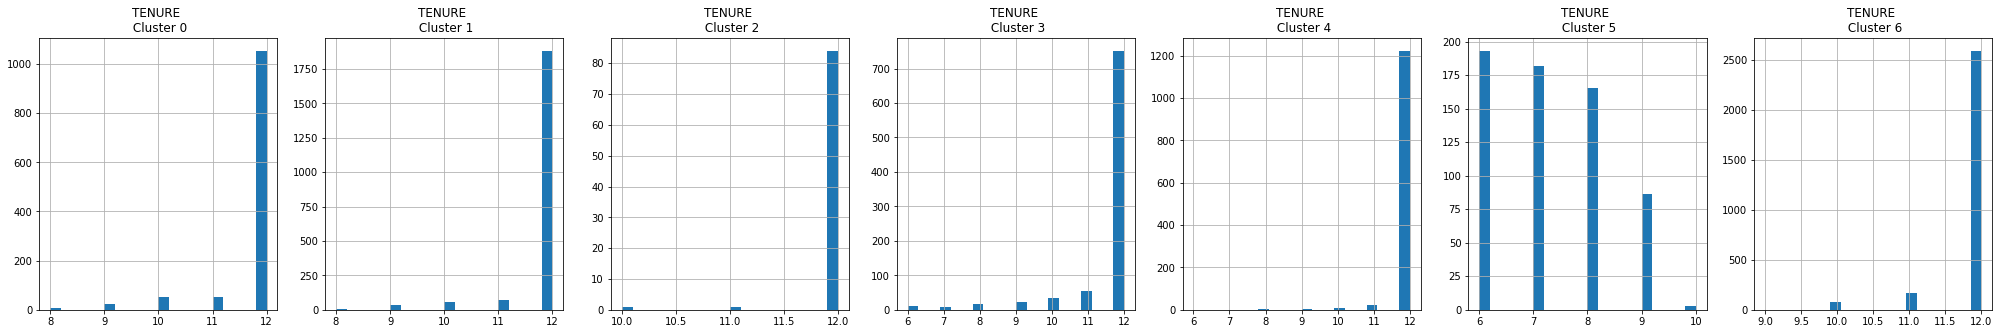

In [5]:
for i in creditcard_df.columns:
  plt.figure(figsize=(35,5))
  for j in range(n_clusters):
    plt.subplot(1, n_clusters, j+1) #número de linhas; colunas; index do gráfico
    cluster = creditcard_df_cluster[creditcard_df_cluster['cluster'] == j] #em cada linha vamos apresentar os atributos específicos para cada um dos grupos
    cluster[i].hist(bins = 20) #Criar histograma | bins = numero de divisões 
    plt.title(f'{i} \n Cluster {j}')
  plt.show()

In [6]:
creditcard_order = creditcard_df_cluster.sort_values(by = 'cluster') #Enviando arquivo com os agrupamentos
creditcard_order.to_csv('creditcard_order.csv', float_format = "%.2f")

## Aplicação de PCA (principal component analysis) e visualização dos resultados

In [7]:
pca = PCA(n_components=2) #número de componentes principais | Vamos transformar 18 características em 2 características
principal_comp = pca.fit_transform(creditcard_scaled_df)
principal_comp

array([[-1.68221937, -1.07645346],
       [-1.13829123,  2.50644797],
       [ 0.96968565, -0.38354438],
       ...,
       [-0.92620446, -1.81077243],
       [-2.33655309, -0.65795086],
       [-0.55642383, -0.40046723]])

In [10]:
pca_df = pd.DataFrame(data = principal_comp, columns = ['pca1','pca2']) #É difícil interpretar esses dados, pois foram realizados vários calculos para defini-los

In [11]:
pca_df = pd.concat([pca_df,
                    pd.DataFrame({'cluster': labels})
                    ], axis=1)
pca_df.head()

,pca1,pca2,cluster
0,-1.682219,-1.076453,6
1,-1.138291,2.506448,3
2,0.969686,-0.383544,4
3,-0.873627,0.043169,6
4,-1.599433,-0.688584,6


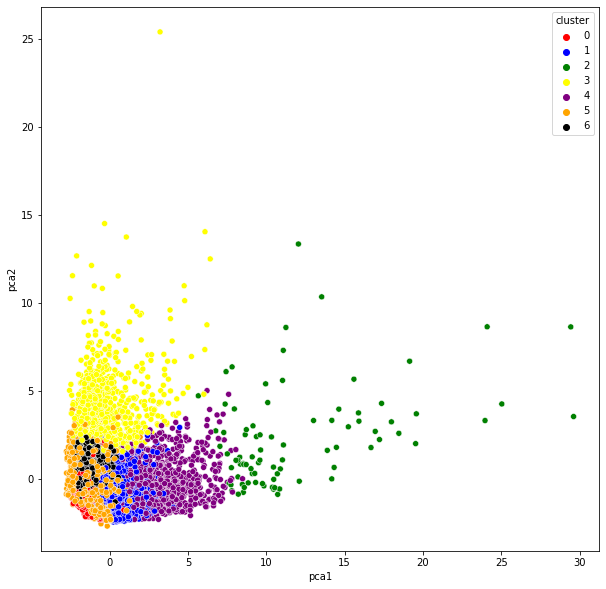

In [14]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'cluster', data = pca_df, palette = ['red','blue','green','yellow','purple','orange', 'black'])

## Aplicação de autoencoders